In [33]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size = 64)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

test_dataloader = DataLoader(test_data, batch_size = 64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.flatten = nn.Flatten()

        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        
        logits = self.linear_relu_stack(x)
        
        return logits

model = NeuralNetwork()

loss_function = nn.CrossEntropyLoss()

In [35]:
def train_loop(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    
    model.train()

    sum_loss = 0
    
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        
        loss = loss_function(pred, y)
        
        sum_loss += loss.item()

        loss.backward()

        optimizer.step()
        
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [37]:
def test_loop(dataloader, model, loss_function):
    model.eval()
    
    size = len(dataloader.dataset)
    
    num_batches = len(dataloader)
    
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)

            test_loss += loss_function(pred, y).item()
            
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    
    correct /= size
    
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    
    return correct, test_loss

In [47]:
def run_training(epochs, train_dataloader, model, loss_function, optimizer):
    test_loss = []
    
    for t in range(epochs):
        print(f"Epoch {t+1}\n--------------------------------")
        
        sum_loss = train_loop(train_dataloader, model, loss_function, optimizer)

        acc, avg_loss = test_loop(test_dataloader, model, loss_function)

        test_loss.append(avg_loss)
    
    print("Done!")
    
    return test_loss

In [49]:
batch_size = 64
epochs = 5
learning_rate = 1e-3

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [51]:
test_loss_sgd = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.159095  [   64/60000]
loss: 2.149498  [ 6464/60000]
loss: 2.080738  [12864/60000]
loss: 2.102732  [19264/60000]
loss: 2.059502  [25664/60000]
loss: 1.979267  [32064/60000]
loss: 2.027855  [38464/60000]
loss: 1.929547  [44864/60000]
loss: 1.939038  [51264/60000]
loss: 1.865826  [57664/60000]
Test Error: 
 Accuracy: 54.7%, Avg loss: 1.860959 

Epoch 2
--------------------------------
loss: 1.893493  [   64/60000]
loss: 1.865839  [ 6464/60000]
loss: 1.730186  [12864/60000]
loss: 1.785087  [19264/60000]
loss: 1.687445  [25664/60000]
loss: 1.615198  [32064/60000]
loss: 1.657680  [38464/60000]
loss: 1.539575  [44864/60000]
loss: 1.571168  [51264/60000]
loss: 1.467771  [57664/60000]
Test Error: 
 Accuracy: 61.4%, Avg loss: 1.486525 

Epoch 3
--------------------------------
loss: 1.549398  [   64/60000]
loss: 1.522901  [ 6464/60000]
loss: 1.359525  [12864/60000]
loss: 1.448159  [19264/60000]
loss: 1.343245  [25664/60000]
loss: 1.321153  [32064/

In [52]:
print(test_loss_sgd)

[1.8609587721004608, 1.4865252933684427, 1.230937320715303, 1.0744413775243578, 0.9728541400781863]


In [57]:
model = NeuralNetwork()

optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate, alpha = 0.9)

test_loss_rms = run_training(epochs, train_dataloader, model, loss_function, optimizer)

Epoch 1
--------------------------------
loss: 2.309170  [   64/60000]
loss: 0.571005  [ 6464/60000]
loss: 0.445894  [12864/60000]
loss: 0.496724  [19264/60000]
loss: 0.498666  [25664/60000]
loss: 0.475492  [32064/60000]
loss: 0.418245  [38464/60000]
loss: 0.517797  [44864/60000]
loss: 0.528686  [51264/60000]
loss: 0.448224  [57664/60000]
Test Error: 
 Accuracy: 82.7%, Avg loss: 0.462491 

Epoch 2
--------------------------------
loss: 0.252671  [   64/60000]
loss: 0.329764  [ 6464/60000]
loss: 0.285406  [12864/60000]
loss: 0.337492  [19264/60000]
loss: 0.350482  [25664/60000]
loss: 0.391601  [32064/60000]
loss: 0.324323  [38464/60000]
loss: 0.436602  [44864/60000]
loss: 0.468740  [51264/60000]
loss: 0.427749  [57664/60000]
Test Error: 
 Accuracy: 85.3%, Avg loss: 0.416451 

Epoch 3
--------------------------------
loss: 0.228033  [   64/60000]
loss: 0.329710  [ 6464/60000]
loss: 0.216267  [12864/60000]
loss: 0.304734  [19264/60000]
loss: 0.376210  [25664/60000]
loss: 0.401192  [32064/

In [58]:
test_loss_rms

[0.4624909665554192,
 0.4164512254250277,
 0.4236662210362732,
 0.4217154445352068,
 0.418915058871743]

## Графики зависимости сходимости

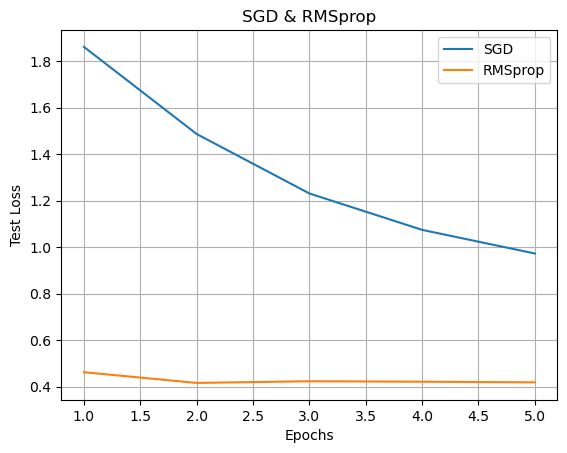

In [61]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs + 1), test_loss_sgd, label='SGD')
plt.plot(range(1, epochs + 1), test_loss_rms, label='RMSprop')

plt.xlabel('Epochs')
plt.ylabel('Test Loss')

plt.title('SGD & RMSprop')

plt.grid(True)

plt.legend()

plt.show()

## Сравнение и выводы